In [47]:
import urllib.request
import json
import pandas as pd
import datetime, time

In [65]:
def getCineInfo():
    movieDate=time.strftime('%Y%m%d',time.localtime(time.time())) #'20191007'
    dt_movieDate=datetime.datetime.strptime(movieDate,'%Y%m%d')

    cine=[]
    df1=pd.DataFrame()

    for i in range(1,30):
        i_dt=(dt_movieDate+datetime.timedelta(days=-i)).strftime('%Y%m%d')

        url=f"http://www.kobis.or.kr/kobisopenapi/webservice/rest/boxoffice/searchDailyBoxOfficeList.json?key=4097192bf62b75ac7c4355c92fbe1fb7&targetDt={i_dt}"
        response=urllib.request.urlopen(url)
        rescode=response.getcode()
        if(rescode==200):
            responseData = response.read()

        result = json.loads(responseData)
        pre_result=result['boxOfficeResult']['dailyBoxOfficeList']

        lst_rank=[]
        lst_movieNm=[]
        lst_audiCnt=[]
        for i in range(0, len(pre_result)):
            pre_result[i]['targetDt']=i_dt
            cine.append(pre_result[i])

    columns=['rnum','rank','rankInten','rankOldAndNew','movieCd','movieNm',
             'openDt','targetDt','salesAmt','salesShare','salesInten',
             'salesChange','salesAcc','audiCnt','audiInten','audiChange',
             'audiAcc','scrnCnt','showCnt']
    df=pd.DataFrame(cine,columns=columns)
    df.to_csv("cinebox.csv",index=False)

    return df



In [66]:
df=getCineInfo()

In [67]:
df.columns

Index(['rnum', 'rank', 'rankInten', 'rankOldAndNew', 'movieCd', 'movieNm',
       'openDt', 'targetDt', 'salesAmt', 'salesShare', 'salesInten',
       'salesChange', 'salesAcc', 'audiCnt', 'audiInten', 'audiChange',
       'audiAcc', 'scrnCnt', 'showCnt'],
      dtype='object')

In [68]:
df.head()

,rnum,rank,rankInten,rankOldAndNew,movieCd,movieNm,openDt,targetDt,salesAmt,salesShare,salesInten,salesChange,salesAcc,audiCnt,audiInten,audiChange,audiAcc,scrnCnt,showCnt
0,1,1,0,OLD,20199950,조커,2019-10-02,20191007,1386982140,49.4,-2309455870,-62.5,20739998050,167699,-247151,-59.6,2367534,1293,6500
1,2,2,0,OLD,20195920,가장 보통의 연애,2019-10-02,20191007,794886970,28.3,-1106355660,-58.2,9921111850,98738,-118239,-54.5,1163222,1012,5012
2,3,3,0,OLD,20184483,퍼펙트맨,2019-10-02,20191007,373285070,13.3,-635892060,-63,5907799350,46972,-68864,-59.4,711272,780,3071
3,4,4,0,OLD,20193601,장사리 : 잊혀진 영웅들,2019-09-25,20191007,90263400,3.2,-187674420,-67.5,8352025650,12036,-21189,-63.8,1050150,567,1431
4,5,5,2,OLD,20194456,양자물리학,2019-09-25,20191007,24664420,0.9,-28527260,-53.6,4461218540,3132,-3050,-49.3,545785,362,607


In [78]:
dataset=pd.read_csv('cinebox.csv', engine='python', encoding='utf-8')
dataset

,rnum,rank,rankInten,rankOldAndNew,movieCd,movieNm,openDt,targetDt,salesAmt,salesShare,salesInten,salesChange,salesAcc,audiCnt,audiInten,audiChange,audiAcc,scrnCnt,showCnt
0,1,1,0,OLD,20199950,조커,2019-10-02,20191007,1386982140,49.4,-2309455870,-62.5,20739998050,167699,-247151,-59.6,2367534,1293,6500
1,2,2,0,OLD,20195920,가장 보통의 연애,2019-10-02,20191007,794886970,28.3,-1106355660,-58.2,9921111850,98738,-118239,-54.5,1163222,1012,5012
2,3,3,0,OLD,20184483,퍼펙트맨,2019-10-02,20191007,373285070,13.3,-635892060,-63.0,5907799350,46972,-68864,-59.4,711272,780,3071
3,4,4,0,OLD,20193601,장사리 : 잊혀진 영웅들,2019-09-25,20191007,90263400,3.2,-187674420,-67.5,8352025650,12036,-21189,-63.8,1050150,567,1431
4,5,5,2,OLD,20194456,양자물리학,2019-09-25,20191007,24664420,0.9,-28527260,-53.6,4461218540,3132,-3050,-49.3,545785,362,607
5,6,6,2,OLD,20188750,나쁜 녀석들: 더 무비,2019-09-11,20191007,18681800,0.7,-19798890,-51.5,39464481084,2362,-2079,-46.8,4559058,287,446
6,7,7,2,OLD,20199446,원스 어폰 어 타임... 인 할리우드,2019-09-25,20191007,16194300,0.6,-21345700,-56.9,2121054970,2032,-2121,-51.1,260173,136,222
7,8,8,0,NEW,20191183,제미니 맨,2019-10-09,20191007,20568000,0.7,20568000,100.0,78672000,1724,1724,100.0,8170,5,5
8,9,9,-4,OLD,20195941,소피와 드래곤: 마법책의 비밀,2019-10-02,20191007,8575500,0.3,-85740740,-90.9,558533830,1177,-10673,-90.1,71597,233,258
9,10,10,-4,OLD,20196380,몬스터 하우스,2019-10-03,20191007,7224100,0.3,-47917300,-86.9,312627800,1055,-5602,-84.2,39053,105,120


In [73]:
#dataset=dataset.drop('Unnamed: 0',axis=1)
dataset.columns

Index(['rnum', 'rank', 'rankInten', 'rankOldAndNew', 'movieCd', 'movieNm',
       'openDt', 'targetDt', 'salesAmt', 'salesShare', 'salesInten',
       'salesChange', 'salesAcc', 'audiCnt', 'audiInten', 'audiChange',
       'audiAcc', 'scrnCnt', 'showCnt'],
      dtype='object')

In [74]:
dataset.head()

,rnum,rank,rankInten,rankOldAndNew,movieCd,movieNm,openDt,targetDt,salesAmt,salesShare,salesInten,salesChange,salesAcc,audiCnt,audiInten,audiChange,audiAcc,scrnCnt,showCnt
0,1,1,0,OLD,20199950,조커,2019-10-02,20191007,1386982140,49.4,-2309455870,-62.5,20739998050,167699,-247151,-59.6,2367534,1293,6500
1,2,2,0,OLD,20195920,가장 보통의 연애,2019-10-02,20191007,794886970,28.3,-1106355660,-58.2,9921111850,98738,-118239,-54.5,1163222,1012,5012
2,3,3,0,OLD,20184483,퍼펙트맨,2019-10-02,20191007,373285070,13.3,-635892060,-63.0,5907799350,46972,-68864,-59.4,711272,780,3071
3,4,4,0,OLD,20193601,장사리 : 잊혀진 영웅들,2019-09-25,20191007,90263400,3.2,-187674420,-67.5,8352025650,12036,-21189,-63.8,1050150,567,1431
4,5,5,2,OLD,20194456,양자물리학,2019-09-25,20191007,24664420,0.9,-28527260,-53.6,4461218540,3132,-3050,-49.3,545785,362,607


In [81]:
dataset.loc[dataset['movieNm']=='조커']

,rnum,rank,rankInten,rankOldAndNew,movieCd,movieNm,openDt,targetDt,salesAmt,salesShare,salesInten,salesChange,salesAcc,audiCnt,audiInten,audiChange,audiAcc,scrnCnt,showCnt
0,1,1,0,OLD,20199950,조커,2019-10-02,20191007,1386982140,49.4,-2309455870,-62.5,20739998050,167699,-247151,-59.6,2367534,1293,6500
10,1,1,0,OLD,20199950,조커,2019-10-02,20191006,3696438010,50.7,-906711140,-19.7,19353015910,414850,-99473,-19.3,2199835,1410,7097
20,1,1,0,OLD,20199950,조커,2019-10-02,20191005,4603149150,53.2,1450662200,46.0,15656577900,514323,157689,44.2,1784985,1418,7214
30,1,1,0,OLD,20199950,조커,2019-10-02,20191004,3152486950,52.8,-2040049960,-39.3,11053428750,356634,-231183,-39.3,1270662,1327,6513
40,1,1,0,OLD,20199950,조커,2019-10-02,20191003,5192536910,48.6,2512047220,93.7,7900941800,587817,264408,81.8,914028,1356,6422
50,1,1,11,OLD,20199950,조커,2019-10-02,20191002,2680489690,52.7,2653414490,9800.2,2708404890,323409,320687,11781.3,326211,1192,5576


In [83]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

In [89]:
#그래프에서 마이너스 폰트 깨지는 문제 해결
mpl.rcParams['axes.unicode_minus']=False

#경고메시지 출력을 무시
import warnings
warnings.filterwarnings('ignore')

In [94]:
dataset2=dataset[dataset['movieNm']=='조커']
dataset2.sort_values(by=['targetDt'], ascending='True',inplace=True)
dataset2

,rnum,rank,rankInten,rankOldAndNew,movieCd,movieNm,openDt,targetDt,salesAmt,salesShare,salesInten,salesChange,salesAcc,audiCnt,audiInten,audiChange,audiAcc,scrnCnt,showCnt
50,1,1,11,OLD,20199950,조커,2019-10-02,20191002,2680489690,52.7,2653414490,9800.2,2708404890,323409,320687,11781.3,326211,1192,5576
40,1,1,0,OLD,20199950,조커,2019-10-02,20191003,5192536910,48.6,2512047220,93.7,7900941800,587817,264408,81.8,914028,1356,6422
30,1,1,0,OLD,20199950,조커,2019-10-02,20191004,3152486950,52.8,-2040049960,-39.3,11053428750,356634,-231183,-39.3,1270662,1327,6513
20,1,1,0,OLD,20199950,조커,2019-10-02,20191005,4603149150,53.2,1450662200,46.0,15656577900,514323,157689,44.2,1784985,1418,7214
10,1,1,0,OLD,20199950,조커,2019-10-02,20191006,3696438010,50.7,-906711140,-19.7,19353015910,414850,-99473,-19.3,2199835,1410,7097
0,1,1,0,OLD,20199950,조커,2019-10-02,20191007,1386982140,49.4,-2309455870,-62.5,20739998050,167699,-247151,-59.6,2367534,1293,6500


<function matplotlib.pyplot.show(*args, **kw)>

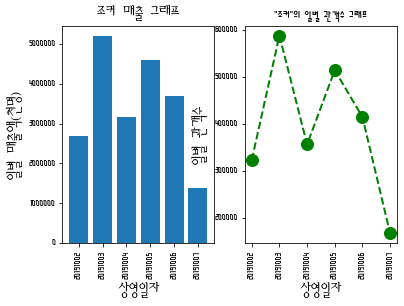

In [139]:
path = 'C:/Windows/Fonts/HMKMAMI.TTF'
fontprop=fm.FontProperties(fname=path, size=18)

plt.subplot(121)
plt.bar(dataset2['targetDt'].astype('str') , dataset2['salesAmt'].astype('float')/1000)
plt.title('조커 매출 그래프', fontproperties=fontprop)
plt.ylabel('일별 매출액(천명)', fontproperties=fontprop)
plt.xlabel('상영일자', fontproperties=fontprop)
plt.xticks(fontsize=10, rotation=90)
plt.show
#plt.savefig('조커 매출 그래프.png')

plt.subplot(122)
plt.plot(dataset2['targetDt'].astype('str') , dataset2['audiCnt'], color='green',
         marker='o', linestyle='dashed', linewidth=2, markersize=12)
plt.title('"{}"의 일별 관객수 그래프'.format('조커'))
plt.ylabel('일별 관객수', fontproperties=fontprop)
plt.xlabel('상영일자', fontproperties=fontprop)
plt.xticks(fontsize=10, rotation=90)
plt.show
#plt.savefig('조커 관객수 그래프.png')

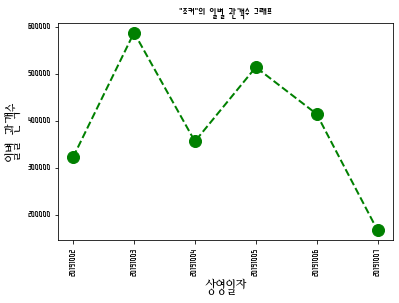

In [132]:
path = 'C:/Windows/Fonts/HMKMAMI.TTF'
fontprop=fm.FontProperties(fname=path, size=18)

#plt.plot(dataset2['targetDt'].astype('str') , dataset2['audiCnt'],'m<-.')
plt.plot(dataset2['targetDt'].astype('str') , dataset2['audiCnt'], color='green',
         marker='o', linestyle='dashed', linewidth=2, markersize=12)
plt.title('"{}"의 일별 관객수 그래프'.format('조커'))
plt.ylabel('일별 관객수', fontproperties=fontprop)
plt.xlabel('상영일자', fontproperties=fontprop)
plt.xticks(fontsize=10, rotation=90)
plt.show
plt.savefig('조커 관객수 그래프.png')

In [133]:
plt.subplot?

Signature: plt.subplot(*args, **kwargs)
Docstring:
Add a subplot to the current figure.

Wrapper of `.Figure.add_subplot` with a difference in behavior
explained in the notes section.

Call signatures::

   subplot(nrows, ncols, index, **kwargs)
   subplot(pos, **kwargs)
   subplot(ax)

Parameters
----------
*args
    Either a 3-digit integer or three separate integers
    describing the position of the subplot. If the three
    integers are *nrows*, *ncols*, and *index* in order, the
    subplot will take the *index* position on a grid with *nrows*
    rows and *ncols* columns. *index* starts at 1 in the upper left
    corner and increases to the right.

    *pos* is a three digit integer, where the first digit is the
    number of rows, the second the number of columns, and the third
    the index of the subplot. i.e. fig.add_subplot(235) is the same as
    fig.add_subplot(2, 3, 5). Note that all integers must be less than
    10 for this form to work.

projection : {None, 'aitoff', 

In [86]:
dataset.loc[dataset['movieNm']=='조커']

,rnum,rank,rankInten,rankOldAndNew,movieCd,movieNm,openDt,targetDt,salesAmt,salesShare,salesInten,salesChange,salesAcc,audiCnt,audiInten,audiChange,audiAcc,scrnCnt,showCnt
0,1,1,0,OLD,20199950,조커,2019-10-02,20191007,1386982140,49.4,-2309455870,-62.5,20739998050,167699,-247151,-59.6,2367534,1293,6500
10,1,1,0,OLD,20199950,조커,2019-10-02,20191006,3696438010,50.7,-906711140,-19.7,19353015910,414850,-99473,-19.3,2199835,1410,7097
20,1,1,0,OLD,20199950,조커,2019-10-02,20191005,4603149150,53.2,1450662200,46.0,15656577900,514323,157689,44.2,1784985,1418,7214
30,1,1,0,OLD,20199950,조커,2019-10-02,20191004,3152486950,52.8,-2040049960,-39.3,11053428750,356634,-231183,-39.3,1270662,1327,6513
40,1,1,0,OLD,20199950,조커,2019-10-02,20191003,5192536910,48.6,2512047220,93.7,7900941800,587817,264408,81.8,914028,1356,6422
50,1,1,11,OLD,20199950,조커,2019-10-02,20191002,2680489690,52.7,2653414490,9800.2,2708404890,323409,320687,11781.3,326211,1192,5576


In [87]:
plt.plot?

Signature: plt.plot(*args, scalex=True, scaley=True, data=None, **kwargs)
Docstring:
Plot y versus x as lines and/or markers.

Call signatures::

    plot([x], y, [fmt], *, data=None, **kwargs)
    plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)

The coordinates of the points or line nodes are given by *x*, *y*.

The optional parameter *fmt* is a convenient way for defining basic
formatting like color, marker and linestyle. It's a shortcut string
notation described in the *Notes* section below.

>>> plot(x, y)        # plot x and y using default line style and color
>>> plot(x, y, 'bo')  # plot x and y using blue circle markers
>>> plot(y)           # plot y using x as index array 0..N-1
>>> plot(y, 'r+')     # ditto, but with red plusses

You can use `.Line2D` properties as keyword arguments for more
control on the appearance. Line properties and *fmt* can be mixed.
The following two calls yield identical results:

>>> plot(x, y, 'go--', linewidth=2, markersize=12)
>>> plot(x, y,